In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder ,scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [20]:
plt.rcParams['figure.figsize'] = (9,5)

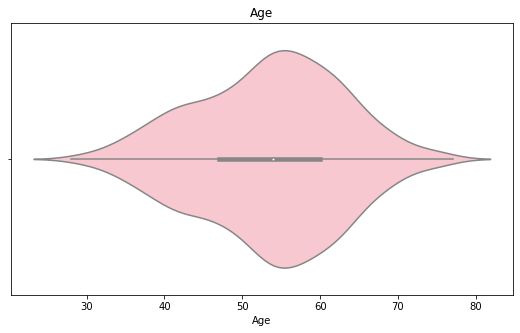

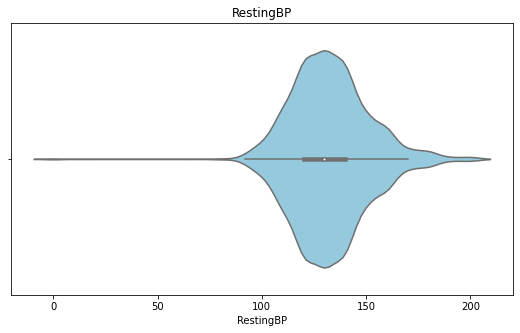

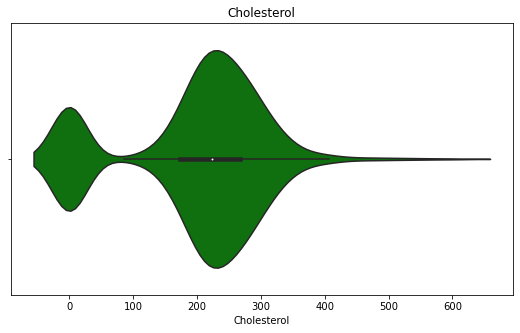

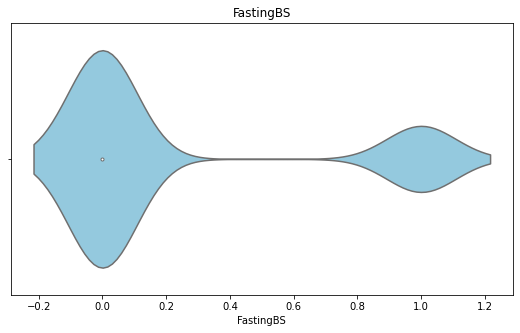

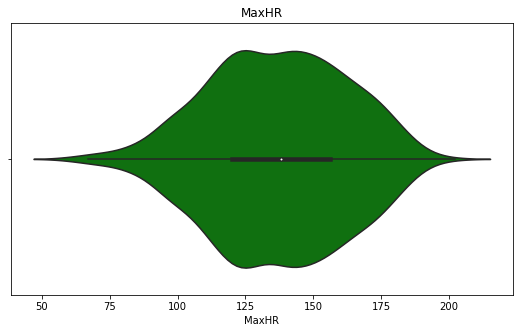

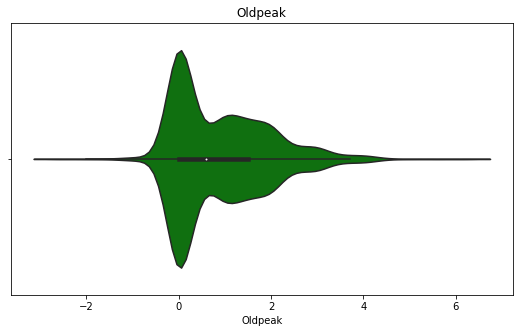

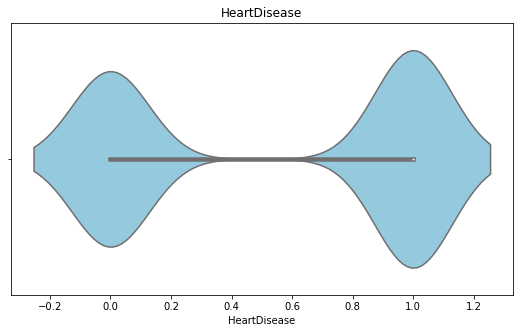

In [25]:
import random

for column in data.columns:
    if data[column].dtype != 'object':
        sns.violinplot(column, data=data, color=random.choice(['green','pink','skyblue']))
#         data[column].value_counts().plot(kind='bar',figsize=(9,5))
        plt.title(column)
        plt.show()

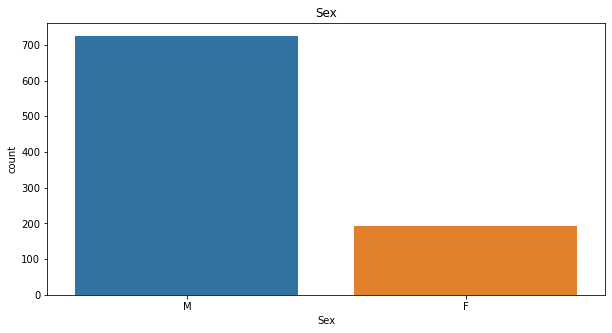

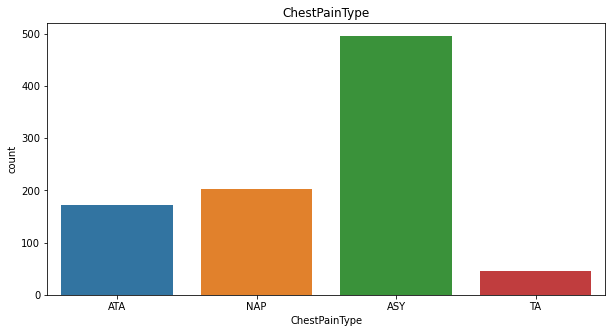

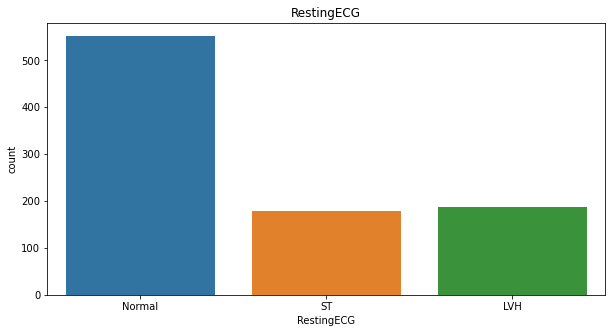

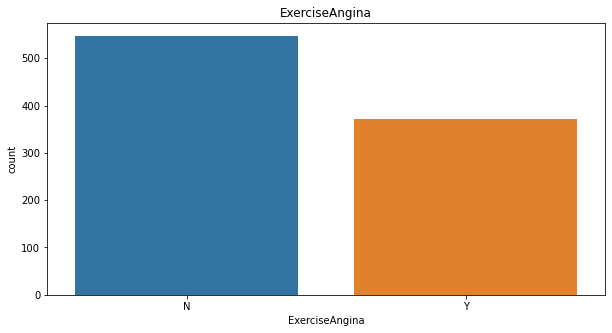

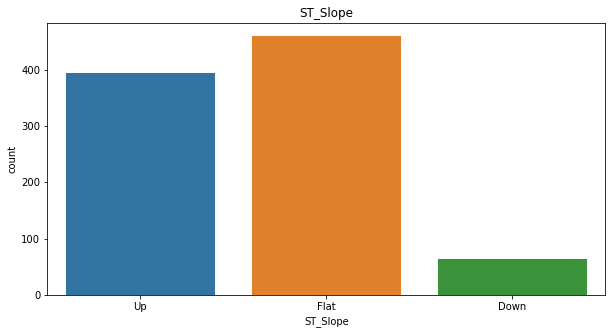

In [12]:
object_column = []
for column in data.columns:
    if data[column].dtype == 'object':
        sns.countplot(column, data=data)
#         data[column].value_counts().plot(kind='bar',figsize=(9,5))
        plt.title(column)
        plt.show()

In [38]:
def sexTransform(value):
    return 1 if value == 'M' else 0

def chestTransform(value):
    if value == 'ASY':
        return 0
    elif value == 'ATA':
        return 1
    elif value == 'NAP':
        return 2
    else:
        return 3

def resting_ecgTransform(value):
    if value == 'LVH':
        return 0
    elif value == 'Normal':
        return 1
    else:
        return 2

def exerciseTransform(value):
    return 1 if value == 'N' else 0
    
def st_slopeTransform(value):
    if value == 'Down':
        return 0
    elif value == 'Flat':
        return 1
    else:
        return 2

In [39]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [40]:
data['Sex'] = data['Sex'].apply(sexTransform)
data['ChestPainType'] = data['ChestPainType'].apply(chestTransform)
data['RestingECG'] = data['RestingECG'].apply(resting_ecgTransform)
data['ExerciseAngina'] = data['ExerciseAngina'].apply(exerciseTransform)
data['ST_Slope'] = data['ST_Slope'].apply(st_slopeTransform)

In [41]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,2,0
1,49,0,2,160,180,0,1,156,1,1.0,1,1
2,37,1,1,130,283,0,2,98,1,0.0,2,0


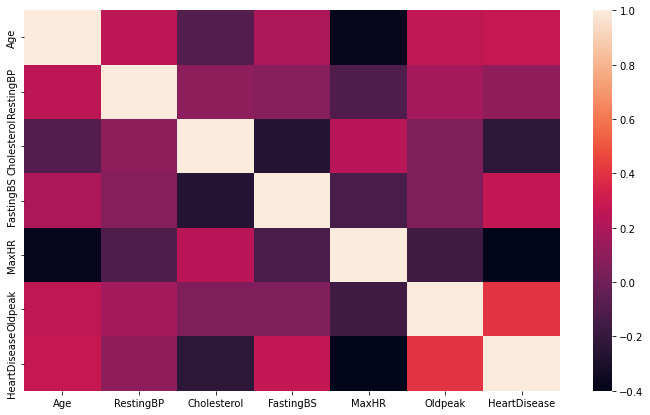

In [13]:
plt.rcParams['figure.figsize'] = (12,7)
sns.heatmap(data.corr())
plt.show()

In [44]:
x= data.drop('HeartDisease',axis = 1)
y = data['HeartDisease']

In [45]:
X = scale(x)

In [46]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42,stratify=y)

In [54]:
def training(X_train,X_test, y_train, y_test):
    
    models= {'nearest neighbors_':KNeighborsClassifier(),'logistic regression_':LogisticRegression(), 
             'random forest_':RandomForestClassifier() , 'decision_trees_':DecisionTreeClassifier(),
             'Extra_trees':ExtraTreesClassifier(),'AdaBoost':AdaBoostClassifier(),
             'catboost':CatBoostClassifier(silent=True), 'xg_boost':XGBClassifier()} 
    
    for x in models:
        models[x].fit(X_train,y_train)
        y_pred = models[x].predict(X_test)
        
        print(x)
        print('')
        print(classification_report(y_test,y_pred))
        print('')

In [55]:
training(X_train,X_test, y_train, y_test)

nearest neighbors_

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


logistic regression_

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184


random forest_

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg  

In [56]:
catboost = CatBoostClassifier(silent=True)
catboost.fit(X_train, y_train)

In [57]:
import pickle
catboost_model = pickle.dump(catboost,open('CatboostModel.pkl','wb'))

In [58]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')